In [1]:
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from numpy import where

In [2]:
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

In [3]:
# change y from {0,1} to {-1,1}
y[where(y == 0)] = -1

In [4]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [5]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='tanh'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='hinge', optimizer=opt, metrics=['accuracy'])

In [6]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)

In [7]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)

In [8]:
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.406, Test: 0.406


In [ ]:
#In this case, we can see slightly worse performance than using cross-entropy, with the chosen
# model configuration with less than 80% accuracy on the train and test sets.

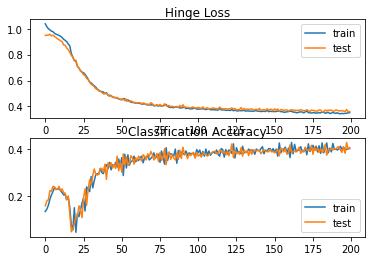

In [9]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Hinge Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Classification Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
'''The plot of hinge loss shows that the model has converged and has reasonable loss
on both datasets. The plot of classification accuracy also shows signs of convergence, albeit at a
lower level of skill than may be desirable on this problem.'''